# Submission Proyek Pertama Machine Learning Terapan

**Klasifikasi Tingkat Keparahan Glioma Menggunakan Data Klinis dan Mutasi Genetik**
- Nama: Christian Nathaniel
- Email: christiannathanielp@gmail.com
- Username: cnginn03

## Import Depedencies

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

## Data Understanding

Dataset [Glioma Grading Clinical and Mutation Features](https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset) berasal dari UCI ML Repo


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
glioma_grading_clinical_and_mutation_features = fetch_ucirepo(id=759)

Features = glioma_grading_clinical_and_mutation_features.data.features
Target = glioma_grading_clinical_and_mutation_features.data.targets

Mengambil Features dan Target dari UCI ML Repo menggunakan properti dari library ucimlrepo yang diimport

In [ ]:
# metadata
print(glioma_grading_clinical_and_mutation_features.metadata)

# variable information
print(glioma_grading_clinical_and_mutation_features.variables)

{'uci_id': 759, 'name': 'Glioma Grading Clinical and Mutation Features', 'repository_url': 'https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/759/data.csv', 'abstract': 'Gliomas are the most common primary tumors of the brain. They can be graded as LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) depending on the histological/imaging criteria. Clinical and molecular/mutation factors are also very crucial for the grading process. Molecular tests are expensive to help accurately diagnose glioma patients.    In this dataset, the most frequently mutated 20 genes and 3 clinical features are considered from TCGA-LGG and TCGA-GBM brain glioma projects.  The prediction task is to determine whether a patient is LGG or GBM with a given clinical and molecular/mutation features. The main objective is to find the optimal subset of mutation genes and clinical features for the glioma grading 

Dataset Glioma Grading Clinical and Mutation Features berisi data klinis dan mutasi genetik dari pasien glioma. Dataset ini digunakan untuk klasifikasi tingkat glioma:

- Target: Grade glioma (0 = LGG, 1 = GBM)
- Fitur: 20 fitur genetik mutasi (biner), 3 fitur klinis (Jenis kelamin, Usia saat diagnosis, Ras)
- Jumlah data: 839 pasien
- Tipe data: Tabular, multivariat, tanpa missing values

Tujuan Mendeteksi apakah pasien tergolong LGG atau GBM dengan fitur klinis dan mutasi untuk meningkatkan akurasi diagnosis dan mengurangi biaya tes molecular.

In [ ]:
df = pd.concat([Features, Target], axis=1)
df

,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade
0,0,51.30,white,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,38.72,white,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,35.17,white,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,32.78,white,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,31.51,white,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,1,77.89,white,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
835,0,85.18,white,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
836,1,77.49,white,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
837,0,63.33,white,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


Menggabungkan Features dan Target pada Dataset dan mengubahnya menjadi Pandas Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            839 non-null    int64  
 1   Age_at_diagnosis  839 non-null    float64
 2   Race              839 non-null    object 
 3   IDH1              839 non-null    int64  
 4   TP53              839 non-null    int64  
 5   ATRX              839 non-null    int64  
 6   PTEN              839 non-null    int64  
 7   EGFR              839 non-null    int64  
 8   CIC               839 non-null    int64  
 9   MUC16             839 non-null    int64  
 10  PIK3CA            839 non-null    int64  
 11  NF1               839 non-null    int64  
 12  PIK3R1            839 non-null    int64  
 13  FUBP1             839 non-null    int64  
 14  RB1               839 non-null    int64  
 15  NOTCH1            839 non-null    int64  
 16  BCOR              839 non-null    int64  
 1

Terdapat 24 kolom, tidak ada yang aneh pada tipe datanya. 20 Fitur genetik bertipe data int (1 dan 0)

In [ ]:
print(f"Data Duplikat: {df.duplicated().sum()}")

Data Duplikat: 1


Terdapat satu data duplikat yang nantinya akan dibersihkan di Preprocessing

In [ ]:
df.isna().sum()

,0
Gender,0
Age_at_diagnosis,0
Race,0
IDH1,0
TP53,0
ATRX,0
PTEN,0
EGFR,0
CIC,0
MUC16,0


Tidak ada data kosong pada dataset, sesuai dengan yang tertulis pada metadata dataset ini.

In [ ]:
df.describe()

,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Grade
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.418355,50.935411,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,0.116806,0.087008,...,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222,0.419547
std,0.493583,15.702339,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,0.321380,0.282015,...,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889,0.493779
min,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,62.800000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,89.290000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data yang ada terlihat normal, tidak ada anomali data yang mencolok.

## Exploratory Data Analysis (EDA)

In [ ]:
numerical_continuous = ['Age_at_diagnosis']
categorical_nominal = ['Gender', 'Race']
categorical_binary = [
    'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16',
    'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
    'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'
]
target_col = 'Grade'

Memecah beberapa kolom ke dalam kategori tipe data, untuk mempermudah mengeksplor masing-masing kategori

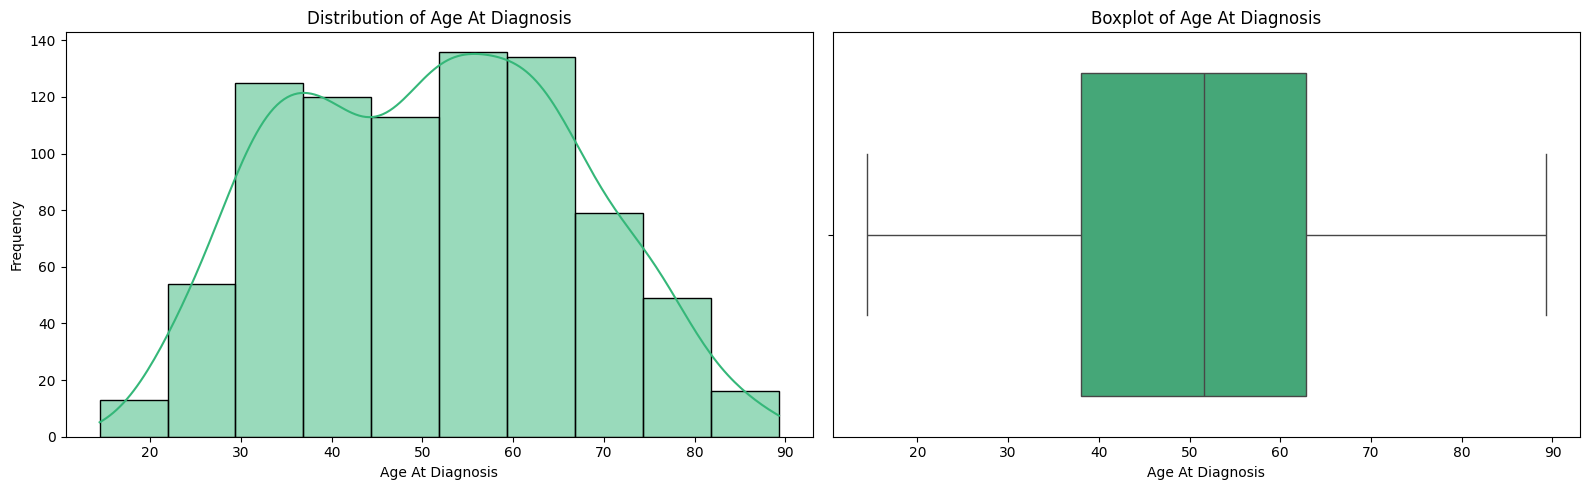

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
col = numerical_continuous[0]

sns.histplot(data=df, x=col, kde=True, bins=10, ax=axes[0], color="#35b779")
axes[0].set_title(f"Distribution of {col.replace('_', ' ').title()}")
axes[0].set_xlabel(col.replace("_", " ").title())
axes[0].set_ylabel("Frequency")

# Boxplot
sns.boxplot(data=df, x=col, ax=axes[1], color="#35b779")
axes[1].set_title(f"Boxplot of {col.replace('_', ' ').title()}")
axes[1].set_xlabel(col.replace("_", " ").title())
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

- Usia pasien saat diagnosis berkisar antara **15 hingga 90 tahun**
- Boxplot menunjukkan **tidak ada outlier ekstrem** yang mencolok.

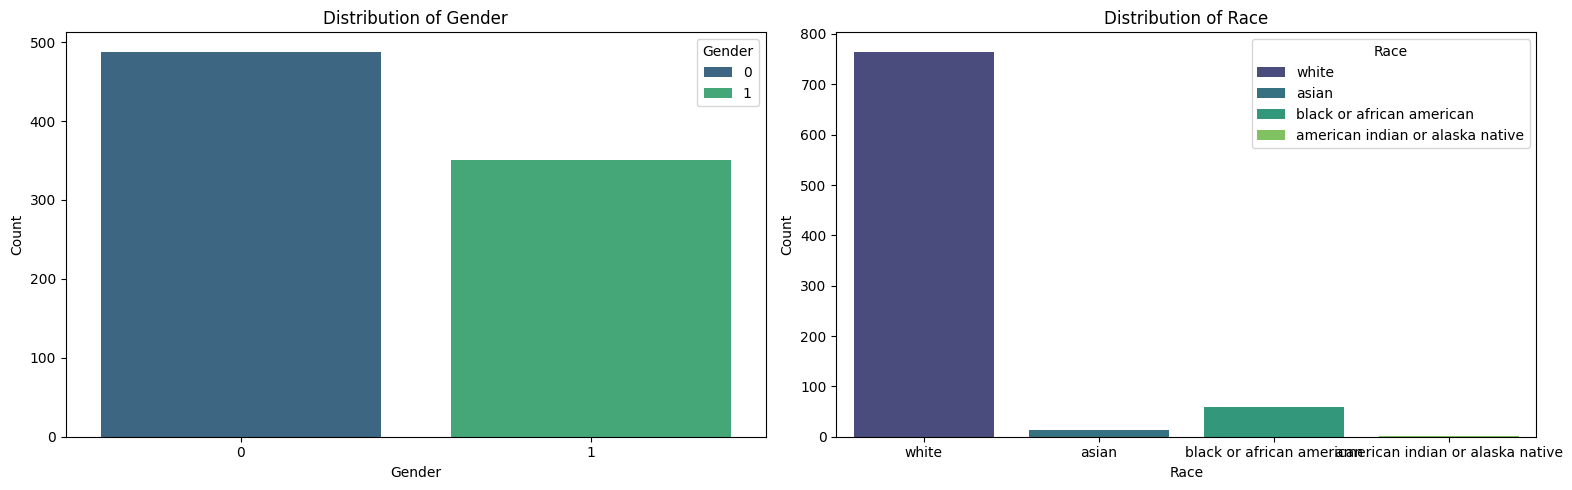

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes = axes.flatten()

for i, col in enumerate(categorical_nominal):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis', hue=col, legend=True)
    axes[i].set_title(f"Distribution of {col.replace('_', ' ').title()}")
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

- Distribusi jenis kelamin cukup seimbang dengan sedikit lebih banyak **laki-laki (0)** dibanding **perempuan (1)**.
- Ras dominan adalah **white**, diikuti oleh **black or african american**, dan minoritas kecil adalah asian dan american indian or alaska native.

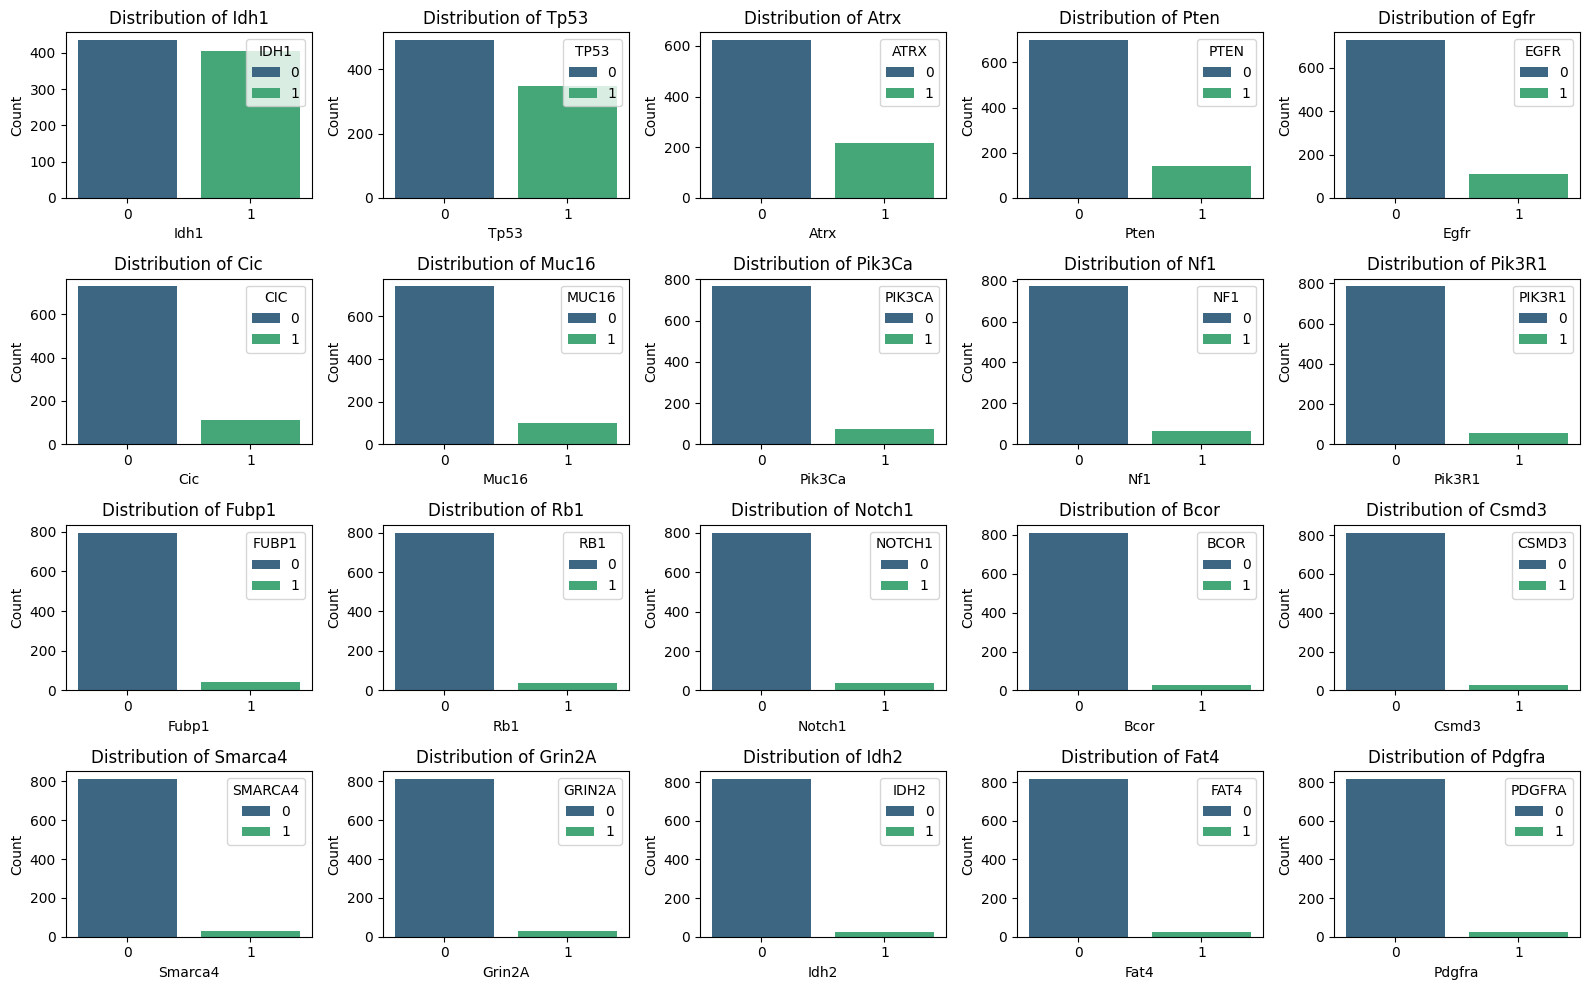

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_binary):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis', hue=col, legend=True)
    axes[i].set_title(f"Distribution of {col.replace('_', ' ').title()}")
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

Semua fitur genetik berupa biner (0 = tidak mutasi, 1 = mutasi).

Mayoritas fitur memiliki lebih banyak kasus tidak mutasi (0) dibanding mutasi (1), menunjukkan mutasi relatif jarang pada beberapa gen.

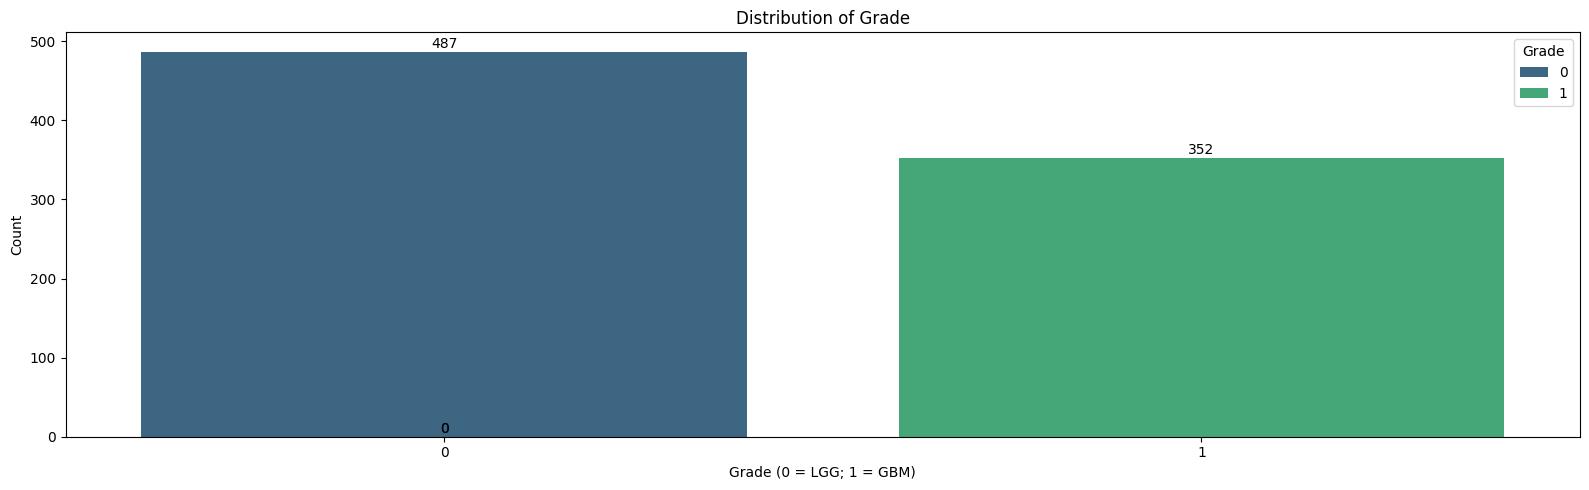

In [ ]:
fig, ax = plt.subplots(figsize=(16, 5))

sns.countplot(x=target_col, data=df, ax=ax, palette='viridis', hue=target_col, legend=True)
ax.set_title(f"Distribution of {target_col}")
ax.set_xlabel(f"{target_col} (0 = LGG; 1 = GBM)")
ax.set_ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 5,
        s=f'{int(height)}',
        ha='center'
    )

plt.tight_layout()
plt.show()

Target terdiri dari dua kelas:
- 0: LGG (Lower Grade Glioma) sebanyak 487 pasien
- 1: GBM (Glioblastoma Multiforme) sebanyak 352 pasien

Data cukup seimbang untuk tugas klasifikasi.

## Data Preprocessing

Pada Data Preprocessing, proses yang dilakukan adalah:
- Menghapus data duplikat agar tidak memengaruhi hasil model.

- Melakukan encoding pada fitur kategorikal Race menggunakan LabelEncoder untuk mengubahnya menjadi nilai numerik.

- Memisahkan fitur (variabel independen) dan target (variabel dependen) untuk pemodelan.

- Membagi dataset menjadi data latih dan data uji dengan proporsi 80:20, menggunakan stratifikasi berdasarkan target untuk menjaga distribusi kelas.

- Melakukan standardisasi pada fitur numerik kontinyu menggunakan StandardScaler agar data memiliki skala yang seragam dan meningkatkan performa model.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
label = LabelEncoder()
df['Race'] = label.fit_transform(df['Race'])

In [ ]:
features = [col for col in df.columns if col != target_col]
X = df[features]
y = df[target_col]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train[numerical_continuous] = scaler.fit_transform(X_train[numerical_continuous])
X_test[numerical_continuous] = scaler.transform(X_test[numerical_continuous])

## Modelling

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Logistic Regression

- Menggunakan model Logistic Regression dengan parameter multi_class='multinomial' dan iterasi maksimum 5000 untuk memastikan konvergensi.

- Mendefinisikan grid hyperparameter untuk pencarian terbaik, meliputi:
  - `Regularisasi C` dengan nilai [0.01, 0.1, 1, 10].
  - `Jenis penalti`: l2, l1, dan elasticnet.
  - `Solver` yang digunakan: lbfgs, liblinear, dan saga.

- Memanfaatkan StratifiedKFold dengan 10 fold (saran dari dataset) dan shuffle untuk validasi silang yang menjaga distribusi kelas.

In [ ]:
lgr = LogisticRegression(multi_class='multinomial', max_iter=5000)

# Hyperparameter grid
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Melakukan pencarian hyperparameter terbaik menggunakan GridSearchCV dengan metrik evaluasi f1_macro dan menjalankan secara paralel (n_jobs=-1).

In [ ]:
lgr_gridcv = GridSearchCV(lgr, logreg_param_grid, cv=skf, scoring='f1_macro', n_jobs=-1)
lgr_gridcv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=5000,
                                          multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='f1_macro')

In [ ]:
print(f"Best Parameters: {lgr_gridcv.best_params_}")
print(f"Best Score: {lgr_gridcv.best_score_}")

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.8740825884890716


Model dengan parameter terbaik disimpan sebagai model_lgr (Model Logistic Linear)

In [ ]:
model_lgr = lgr_gridcv.best_estimator_
model_lgr

LogisticRegression(C=10, max_iter=5000, multi_class='multinomial')

Melakukan prediksi pada data uji dan menampilkan laporan klasifikasi (classification report) untuk mengevaluasi performa model.

In [ ]:
y_pred_lgr = model_lgr.predict(X_test)
print(classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        97
           1       0.81      0.86      0.84        71

    accuracy                           0.86       168
   macro avg       0.85      0.86      0.85       168
weighted avg       0.86      0.86      0.86       168



Model mencapai akurasi 86% pada data uji, menunjukkan performa prediksi yang baik.
- Untuk kelas 0:

  - Precision 89%, artinya 89% prediksi kelas 0 benar.

  - Recall 86%, artinya 86% data aktual kelas 0 berhasil terdeteksi.

  - F1-score 87% sebagai keseimbangan precision dan recall.

- Untuk kelas 1:

  - Precision 81%, recall 86%, dan F1-score 84%, menunjukkan model juga efektif mendeteksi kelas ini.

Rata-rata makro (menghitung rata-rata tanpa memperhatikan proporsi kelas) F1-score adalah 85%, menandakan performa seimbang antar kelas.
Rata-rata tertimbang (weighted avg) juga 86%, memperhitungkan proporsi masing-masing kelas.

### Random Forest

- Menggunakan model Random Forest dengan parameter random_state=42.

- Mendefinisikan grid hyperparameter untuk pencarian terbaik, meliputi:
  - `n_estimators`: jumlah pohon di hutan, dengan opsi 100 dan 200.

  - `max_depth`: kedalaman maksimum pohon, opsi 3, 5, dan 10.

  - `min_samples_split`: minimum sampel untuk memecah node, 5 dan 10.

  - `min_samples_leaf`: minimum sampel pada daun, 2 dan 4.

  - `class_weight`: di-set menjadi 'balanced' untuk menangani ketidakseimbangan kelas.

- Memanfaatkan StratifiedKFold dengan 10 fold (saran dari dataset) dan shuffle untuk validasi silang yang menjaga distribusi kelas.

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'class_weight': ['balanced']
}
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Melakukan pencarian hyperparameter terbaik menggunakan GridSearchCV dengan metrik evaluasi f1_macro dan menjalankan secara paralel (n_jobs=-1).

In [ ]:
rf_gridcv = GridSearchCV(rf, rf_param_grid, cv=skf, scoring='f1_macro')
rf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'], 'max_depth': [3, 5, 10],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

In [ ]:
print(f"Best Parameters: {rf_gridcv.best_params_}")
print(f"Best Score: {rf_gridcv.best_score_}")

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.8746315928263515


Model dengan parameter terbaik disimpan sebagai model_rf (Model Random Forest)

In [ ]:
model_rf = rf_gridcv.best_estimator_
model_rf

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        97
           1       0.79      0.92      0.85        71

    accuracy                           0.86       168
   macro avg       0.86      0.87      0.86       168
weighted avg       0.87      0.86      0.86       168



Model mencapai akurasi 86% pada data uji, menunjukkan performa prediksi yang baik.
- Untuk kelas 0:

  - Precision 93%, artinya 93% prediksi kelas 0 benar.

  - Recall 82%, artinya 82% data aktual kelas 0 berhasil terdeteksi.

  - F1-score 87% sebagai keseimbangan precision dan recall.

- Untuk kelas 1:

  - Precision 79%, recall 92%, dan F1-score 85%, menunjukkan model juga efektif mendeteksi kelas ini.

Rata-rata makro (menghitung rata-rata tanpa memperhatikan proporsi kelas) F1-score adalah 86%, menandakan performa seimbang antar kelas.
Rata-rata tertimbang (weighted avg) juga 86%, memperhitungkan proporsi masing-masing kelas.

## Evaluation Metrics

Melakukan Perbandingan antara F1 Score dan Akurasi pada model Logistic Regression dan Random Forest menggunakan visualisasi.

In [ ]:
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lgr),
    'Random Forest': accuracy_score(y_test, y_pred_rf)
}

f1_scores = {
    'Logistic Regression': f1_score(y_test, y_pred_lgr, average='macro'),
    'Random Forest': f1_score(y_test, y_pred_rf, average='macro')
}

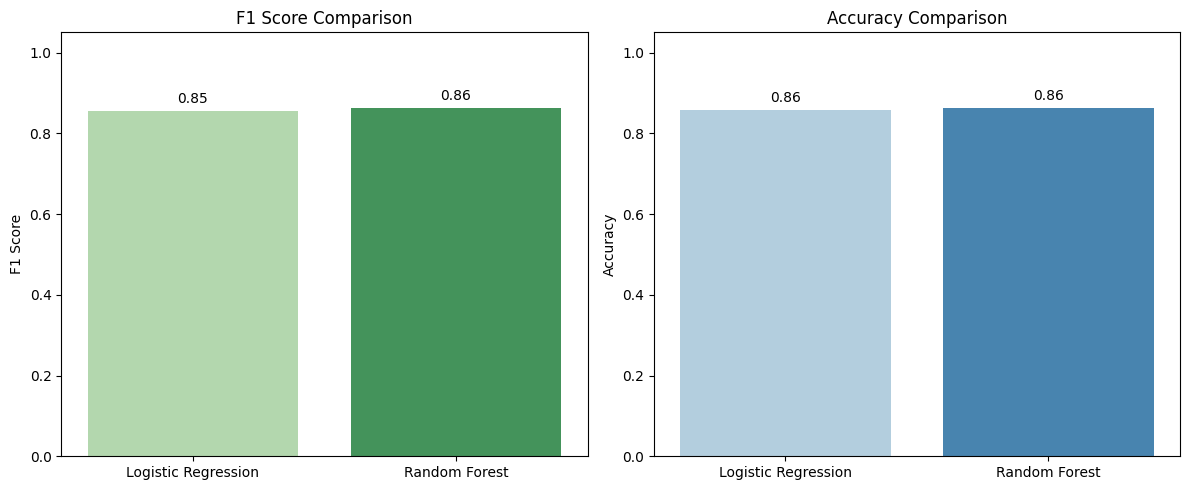

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# F1 Score Barplot
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), ax=axes[0], palette='Greens')
axes[0].set_title("F1 Score Comparison")
axes[0].set_ylim(0, 1.05)
axes[0].set_ylabel("F1 Score")

for i, val in enumerate(f1_scores.values()):
    axes[0].text(i, val + 0.02, f"{val:.2f}", ha='center')

# Accuracy Barplot
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), ax=axes[1], palette='Blues')
axes[1].set_title("Accuracy Comparison")
axes[1].set_ylim(0, 1.05)
axes[1].set_ylabel("Accuracy")

for i, val in enumerate(accuracy_scores.values()):
    axes[1].text(i, val + 0.02, f"{val:.2f}", ha='center')

plt.tight_layout()
plt.show()

Melakukan perbandingan evaluasi metrik menggunakan Confusion Matrix dan divisualisasikan.

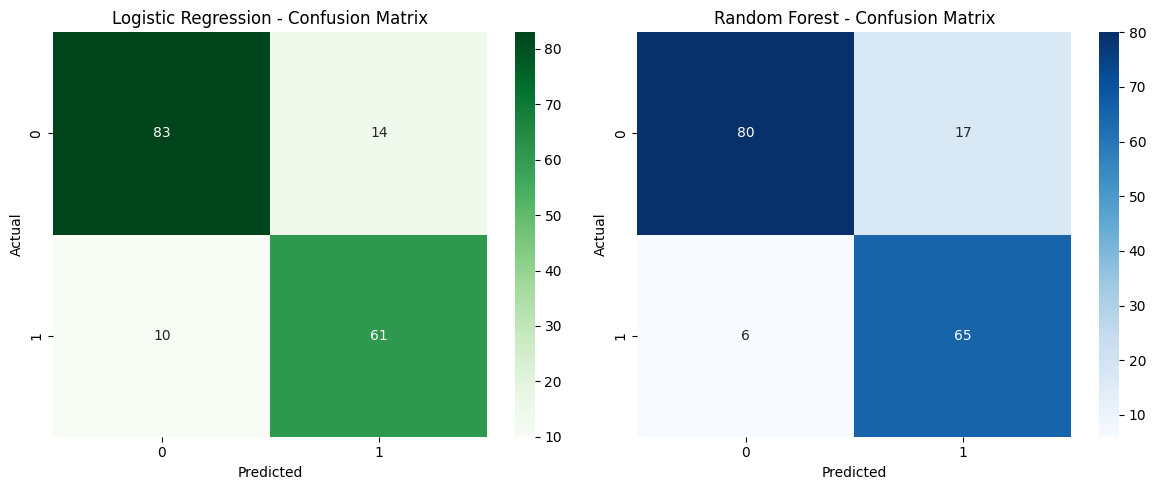

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lgr), annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title("Logistic Regression - Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Random Forest - Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Berdasarkan hasil evaluasi dua model klasifikasi, yaitu Logistic Regression dan Random Forest, didapatkan nilai akurasi dan f1-score yang cukup dekat, yaitu Logistic Regression dengan akurasi 0.86 dan f1-score 0.85, serta Random Forest dengan akurasi 0.86 dan f1-score 0.86.

Namun demikian, analisis lanjutan melalui **confusion matrix** menunjukkan bahwa Random Forest memiliki jumlah **false negative (FN) yang lebih rendah**, yaitu 6 kasus, dibandingkan Logistic Regression yang mencatatkan 10 kasus. Dalam konteks prediksi medis, khususnya deteksi glioma, **false negative merupakan jenis kesalahan yang paling kritis**, karena kesalahan ini berarti pasien yang sebenarnya positif (mengidap glioma) tidak terdeteksi dan berisiko tidak mendapatkan penanganan yang tepat waktu.

Dengan mempertimbangkan bahwa **keselamatan pasien adalah prioritas utama**, maka **model Random Forest dipilih sebagai model terbaik** karena kemampuannya dalam meminimalkan kesalahan prediksi negatif palsu, yang sangat krusial dalam aplikasi nyata di bidang kesehatan.